In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')


jp = pd.read_csv('../data/clean/japan_floods_cleaned.csv')
print(jp.shape)
jp.head()

(44, 5)


,year,start_date,state,human_fatality,affected
0,2004,2004-07-12,"Hukusima, Niigata",21,25807
1,1972,1972-07-03,NaN,458,0
2,1998,1998-08-26,NaN,16,24033
3,2005,2005-06-28,Niigata,0,900
4,1995,1995-07-01,NaN,0,12000


In [2]:
jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            44 non-null     int64 
 1   start_date      44 non-null     object
 2   state           19 non-null     object
 3   human_fatality  44 non-null     int64 
 4   affected        44 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [18]:
jp[['year', 'human_fatality', 'affected']].describe().T

,count,mean,std,min,25%,50%,75%,max
year,44.0,2000.795455,16.415505,1967.0,1988.75,2004.0,2015.25,2023.0
human_fatality,44.0,47.545455,102.090806,0.0,4.25,11.0,27.00,458.0
affected,44.0,60533.500000,232250.081847,0.0,240.25,3925.5,24556.00,1500102.0


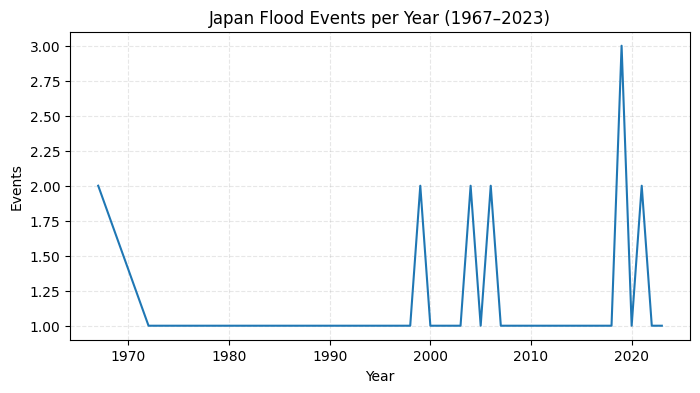

In [17]:
year_counts = jp['year'].value_counts().sort_index()

year_counts.plot(figsize=(8,4))
plt.title('Japan Flood Events per Year (1967–2023)')
plt.xlabel('Year')
plt.ylabel('Events')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

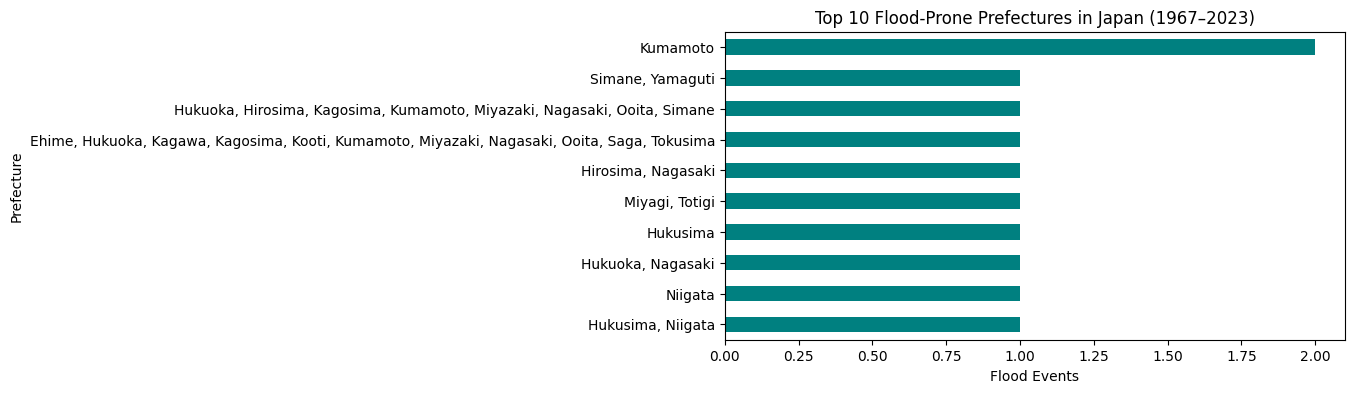

In [7]:
top_prefs = (jp['state']
             .value_counts()
             .head(10)
             .sort_values())

top_prefs.plot(kind='barh', figsize=(8,4), color='teal')
plt.title('Top 10 Flood-Prone Prefectures in Japan (1967–2023)')
plt.xlabel('Flood Events')
plt.ylabel('Prefecture')
plt.show()

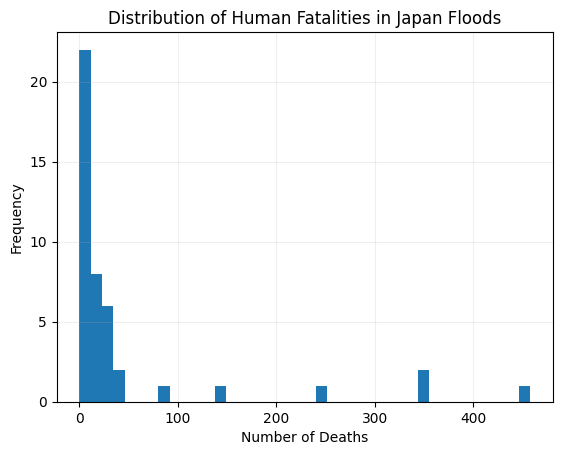

In [8]:
jp['human_fatality'].hist(bins=40)
plt.title('Distribution of Human Fatalities in Japan Floods')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.show()

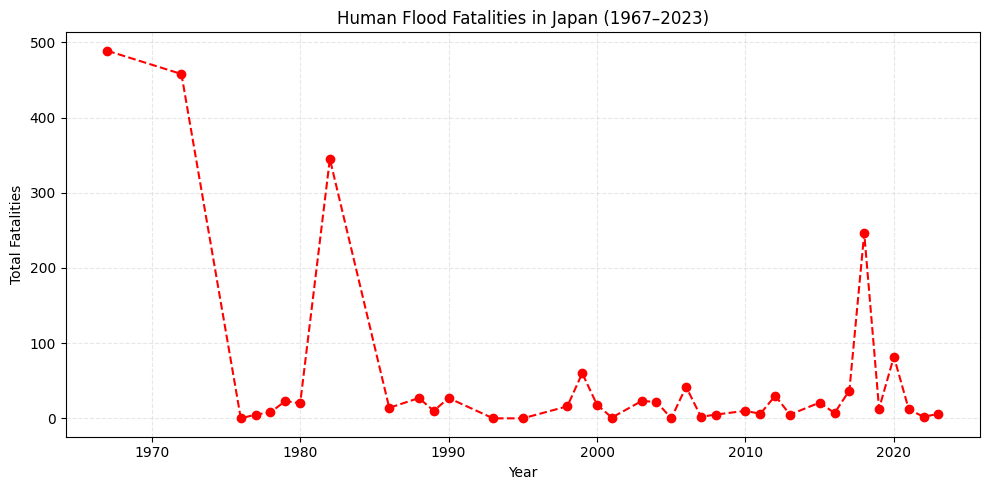

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned Japan flood data
jp = pd.read_csv('../data/clean/japan_floods_cleaned.csv')

# Ensure fatalities column is numeric and fill any NaNs with 0
jp['human_fatality'] = pd.to_numeric(jp['human_fatality'], errors='coerce').fillna(0).astype(int)

# Prepare yearly fatalities (sum per year)
fatalities_per_year = jp.groupby('year')['human_fatality'].sum().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(fatalities_per_year.index, fatalities_per_year.values,
         marker='o', linestyle='--', color='red')
plt.title('Human Flood Fatalities in Japan (1967–2023)')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

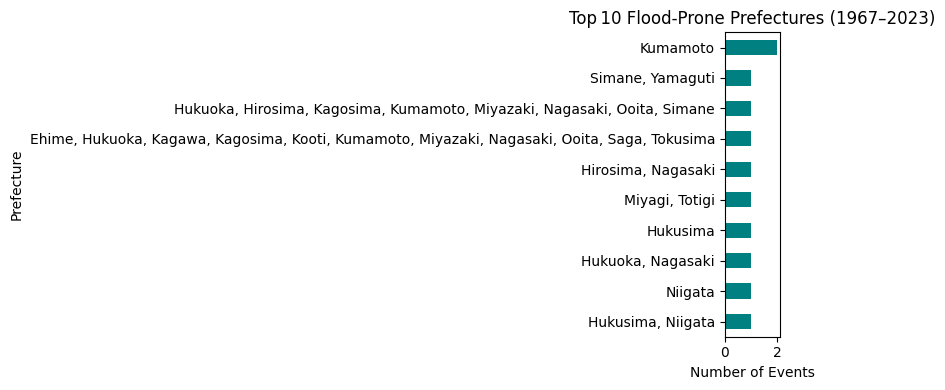

In [23]:
# Count flood events per prefecture
pref_counts = (
    jp['state']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

plt.figure(figsize=(8, 4))
pref_counts.plot(kind='barh', color='teal')
plt.title('Top 10 Flood‑Prone Prefectures (1967–2023)')
plt.xlabel('Number of Events')
plt.ylabel('Prefecture')
plt.tight_layout()
plt.show()

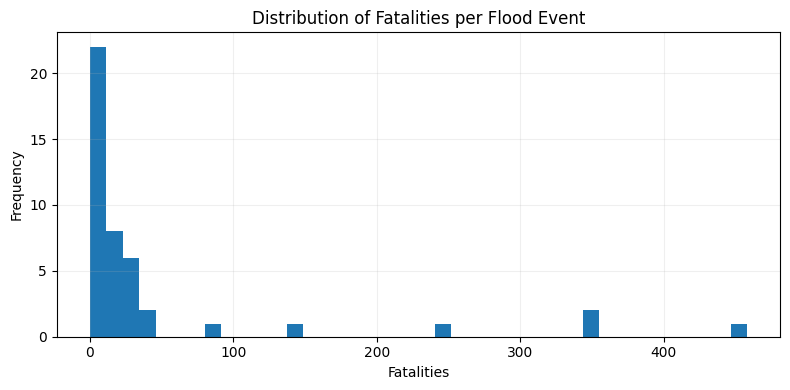

In [24]:
plt.figure(figsize=(8, 4))
jp['human_fatality'].hist(bins=40)
plt.title('Distribution of Fatalities per Flood Event')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()